# Frozen Lake

**"Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend."**

from [openai](https://gym.openai.com/envs/FrozenLake-v0/)


In [1]:
# all imports
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
# creating the MDP
wrapper = gym.Wrapper(gym.make("FrozenLake-v0"))


## The MDP has the following form:


![frozen](img/fl.png)




We always can use some methods from the wrapper class to see some aspects of the MDP

In [3]:
print("observation space: {}".format(wrapper.observation_space))
print("Actions space: {}".format(wrapper.action_space))
print("reward range: {}".format(wrapper.reward_range))

observation space: Discrete(16)
Actions space: Discrete(4)
reward range: (-inf, inf)


## Using the method render, we can visualize the agent moving in the enviroment

- S is start

- F is frozen

- H is hole

- G is goal

In [4]:
plan = [1,1,1,2]

wrapper.reset()
wrapper.render()

for i in range(len(plan)):
        action = plan[i]
        obs, reward , done , info = wrapper.step(action)
        wrapper.render()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


## Playing 100 episodes with random actions

In [5]:
total_reward = 0

episodes = 200

for i in range(episodes):
    done = False
    wrapper.reset()
    while done is False:
        action = wrapper.action_space.sample()
        _, reward , done , _ = wrapper.step(action)
        total_reward += reward
        
print("Average reward = {}".format(total_reward/episodes))

Average reward = 0.01


## We can create random policies

In [6]:
# deterministic_policy

def create_deterministic_policy(env):
    """
    using an enviroment with discrete states this function returns
    a dictionary state:action
    
    :type env: gym.Env
    :rtype: dict {int: int}
    """
    assert type(env.observation_space) == gym.spaces.discrete.Discrete
    number_states = env.observation_space.n
    number_actions = env.action_space.n 
    policy = {}
    for i in range(number_states):
        action = np.random.randint(number_actions,
                                   size=1)[0]
        assert env.action_space.contains(action)
        assert env.observation_space.contains(i)
        policy[i]= action
    return policy


def create_initial_V(env,random=False):
    """
    Using an enviroment with discrete states this function returns
    a dictionary state:value. The initial value of an state value function.
    It can start with all values set to zeros, or with randon numbers. 
    
    :type env: gym.Env
    :type random: boolean
    :rtype: np.array
    """
    assert type(env.observation_space) == gym.spaces.discrete.Discrete
    number_states = env.observation_space.n
    if random:
        V = np.random.normal(0, 1, number_states)
    else:
        V = np.zeros(number_states)
    return V

def create_initial_Q(env,random=False):
    """
    Using an enviroment with discrete states this function returns
    a dictionary state:value. The initial value of an state value function.
    It can start with all values set to zeros, or with randon numbers. 
    
    :type env: gym.Env
    :type random: boolean
    :rtype: np.array
    """
    assert type(env.observation_space) == gym.spaces.discrete.Discrete
    number_states = env.observation_space.n
    number_actions = env.action_space.n
    Q_shape = (number_states, number_actions) 
    if random:
        Q = np.random.normal(0, 1, Q_shape)
    else:
        Q = np.zeros(Q_shape)
    return Q

def softmax(x):
    """
    Compute softmax values for each
    sets of scores in x.
    
    :type x: np.array
    :rtype: np.array
    """
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) 

def create_stochastic_policy(env,low=5.0,high=10.0):
    """
    using an enviroment with discrete states this function returns
    a dictionary state:[prob of actions]
    
    :type env: gym.Env
    :rtype: dict {int: [float]}
    """
    assert type(env.observation_space) == gym.spaces.discrete.Discrete
    number_states = env.observation_space.n
    number_actions = env.action_space.n 
    policy = {}
    for i in range(number_states):
        actions = np.random.randint(low,
                                    high,
                                    size=number_actions)
        actions = softmax(actions)
        assert env.observation_space.contains(i)
        policy[i]= actions
    return policy
    

## Checking an deterministic policy

In [7]:
policy = create_deterministic_policy(wrapper)


total_reward = 0

episodes = 200

for i in range(episodes):
    done = False
    obs = wrapper.reset()
    while done is False:
        action = policy[obs]
        obs, reward , done , _ = wrapper.step(action)
        total_reward += reward
        
print("Average reward = {}".format(total_reward/episodes))
print("Policy = ")
print(policy)

Average reward = 0.0
Policy = 
{0: 1, 1: 2, 2: 0, 3: 3, 4: 3, 5: 0, 6: 3, 7: 1, 8: 1, 9: 0, 10: 2, 11: 2, 12: 0, 13: 1, 14: 1, 15: 1}


## Checking an stochastic policy

In [8]:
policy = create_stochastic_policy(wrapper)

actions = list(range(wrapper.action_space.n))

total_reward = 0

episodes = 200

for i in range(episodes):
    done = False
    obs = wrapper.reset()
    while done is False:
        probabilities = policy[obs]
        action = np.random.choice(actions, 1, p=probabilities)[0]
        obs, reward , done , _ = wrapper.step(action)
        total_reward += reward
        
print("Average reward = {}".format(total_reward/episodes))
print("Policy = ")
for state, actions in policy.items():
    actions = ", ".join(["{:.4f}".format(prob) for prob in actions])
    print("{0:3d} [{1}]".format(state, actions))

Average reward = 0.005
Policy = 
  0 [0.0963, 0.7112, 0.0963, 0.0963]
  1 [0.0174, 0.0174, 0.9479, 0.0174]
  2 [0.0339, 0.6815, 0.2507, 0.0339]
  3 [0.5344, 0.0723, 0.1966, 0.1966]
  4 [0.0723, 0.1966, 0.5344, 0.1966]
  5 [0.0128, 0.0347, 0.6964, 0.2562]
  6 [0.2500, 0.2500, 0.2500, 0.2500]
  7 [0.0169, 0.0458, 0.9205, 0.0169]
  8 [0.0414, 0.8310, 0.1125, 0.0152]
  9 [0.0237, 0.4763, 0.0237, 0.4763]
 10 [0.4643, 0.0085, 0.0628, 0.4643]
 11 [0.0237, 0.4763, 0.4763, 0.0237]
 12 [0.0403, 0.1096, 0.8098, 0.0403]
 13 [0.1096, 0.0403, 0.8098, 0.0403]
 14 [0.4576, 0.0619, 0.0228, 0.4576]
 15 [0.2500, 0.2500, 0.2500, 0.2500]


# Monte carlo estimation

**Monte Carlo methods** are ways of solving the reinforcement learning problem based on averaging sample returns.

Suppose we wish to estimate $V^{\pi}(s)$, the value of state $s$ under policy $\pi$, given a set of episodes obtained by following $\pi$ and passing through $s$. Each occurence of state $s$ in an episode is called a **visit** to $s$. We can also estimate $Q^{\pi}(s,a)$

- ** First-visit MC method**, $V^{\pi}(s)$ and $Q^{\pi}(s,a)$ are estimated as the first return from a visits to $s$ (taking action $a$) in a set of episodes

- ** Every-visit MC method**, $V^{\pi}(s)$ and $Q^{\pi}(s,a)$ are estimated as the average of the returns following all the visits to $s$ (taking action $a$) in a set of episodes


In [9]:
# def first_visit_MC(env, policy, episodes, deterministic=True, random=False):
#     """
#     Calculates V and Q values for the policy in a set of episodes

#     :type env: gym.Env
#     :type policy: dict {int: int} or {int: [float]}
#     :type episodes: int
#     :type deterministic: boolean
#     :type random: boolean
#     :rtype V: np.array, shape = env..observation_space.n
#     :rtype Q: np.array, shape = (env.observation_space.n,
#                                  env.action_space.n)
#     """
#     actions = list(range(env.action_space.n))
#     V = create_initial_V(env, random)
#     Q = create_initial_Q(env, random)
#     for i in range(episodes):
#         Q_prime = defaultdict(lambda:None)
#         V_prime = defaultdict(lambda:None)
#         old_obs = env.reset()
#         done = False
#         R = 0
#         while not done:
#             if deterministic:
#                 action = policy[old_obs]
#             else:
#                 probabilities = policy[old_obs]
#                 action = np.random.choice(actions, 1, p=probabilities)[0]
#             obs, reward , done , _ = wrapper.step(action)
#             R += reward
#             if Q_prime[(old_obs, action)] is None:
#                 Q_prime[(old_obs, action)] = R
#             if V_prime[old_obs] is None:
#                 V_prime[old_obs] = R
#             old_obs = obs
#         for state, action in Q_prime:
#             Q[state][action] += R - Q_prime[(state, action)]
#         for state in V_prime:
#             V[state] += R - V_prime[state]
            
#     Q = Q / episodes
#     V = V / episodes
#     return V, Q
    



def every_visit_MC(env, policy, episodes, deterministic=True, random=False):
    """
    Calculates V and Q values for the policy in a set of episodes

    :type env: gym.Env
    :type policy: dict {int: int} or {int: [float]}
    :type episodes: int
    :type deterministic: boolean
    :type random: boolean
    :rtype V: np.array, shape = env..observation_space.n
    :rtype Q: np.array, shape = (env.observation_space.n,
                                 env.action_space.n)
    """
    actions = list(range(env.action_space.n))
    V = create_initial_V(env, random)
    Q = create_initial_Q(env, random)
    for i in range(episodes):
        Q_prime = defaultdict(lambda:[])
        V_prime = defaultdict(lambda:[])
        old_obs = env.reset()
        done = False
        R = 0
        while not done:
            if deterministic:
                action = policy[old_obs]
            else:
                probabilities = policy[old_obs]
                action = np.random.choice(actions, 1, p=probabilities)[0]
            obs, reward , done , _ = wrapper.step(action)
            R += reward
            Q_prime[(old_obs, action)].append(R)          
            V_prime[old_obs].append(R)
            old_obs = obs
        for state, action in Q_prime:
            Q[state][action] += R - np.mean(Q_prime[(state, action)])
        for state in V_prime:
            V[state] += R - np.mean(V_prime[state])

    Q = Q / episodes
    V = V / episodes
    return V, Q
    
def first_visit_MC(env, policy, episodes, deterministic=True, random=False):
    """
    Calculates V and Q values for the policy in a set of episodes

    :type env: gym.Env
    :type policy: dict {int: int} or {int: [float]}
    :type episodes: int
    :type deterministic: boolean
    :type random: boolean
    :rtype V: np.array, shape = env.observation_space.n
    :rtype Q: np.array, shape = (env.observation_space.n,
                                 env.action_space.n)
    """
    value_deb1 = []
    value_deb2 = []
    state_count = np.ones(env.observation_space.n)
    actions = list(range(env.action_space.n))
    V = create_initial_V(env, random)
    Q = create_initial_Q(env, random)
    for i in range(episodes):
        Q_prime = defaultdict(lambda:None)
        V_prime = defaultdict(lambda:None)
        old_obs = env.reset()
        done = False
        R = 0
        while not done:
            state_count[old_obs] += 1
            if deterministic:
                action = policy[old_obs]
            else:
                probabilities = policy[old_obs]
                action = np.random.choice(actions,
                                          p=probabilities)
            obs, reward , done , _ = env.step(action)
            if Q_prime[(old_obs, action)] is None:
                Q_prime[(old_obs, action)] = R
            if V_prime[old_obs] is None:
                V_prime[old_obs] = R
            R += reward
            old_obs = obs
        for state, action in Q_prime:
            Q[state][action] += R - Q_prime[(state, action)]
        for state in V_prime:
            V[state] += R - V_prime[state]
        
        if i%10 == 0:
            value_deb1.append(V[14]/state_count[14])
            value_deb2.append(V[0]/state_count[0])
    
    Q = Q / episodes
    V = V / state_count
    return V, Q, value_deb1, value_deb2
    





### Estimating V and Q with first visit MC

In [10]:
pi = create_stochastic_policy(wrapper)

episodes = 20000

V_pi, Q_pi, _, _ = first_visit_MC(wrapper, pi, episodes, deterministic=False, random=False)


### Estimating V and Q with every visit MC

In [11]:
# pi = create_stochastic_policy(wrapper)

# episodes = 20000

# V_pi, Q_pi = every_visit_MC(wrapper, pi, episodes, deterministic=False, random=False)


**after this processes we can visualize the V as a matrix and the Q table**


![frozen](img/V_Q.png)




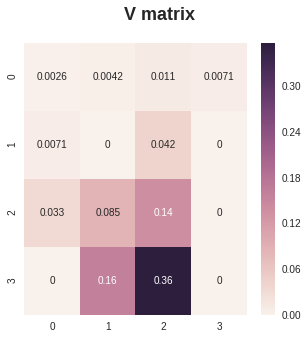

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(V_pi.reshape((4,4)), annot=True)
ax.grid()
fig.suptitle("V matrix", fontsize=18, fontweight='bold')
plt.show()

In [13]:
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax = sns.heatmap(Q_pi, annot=True)
# fig.suptitle("Q table", fontsize=18, fontweight='bold')
# plt.show()